### Data collection and preprocessing

##### Importing Necessary Libraries

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn. ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

#### Loading the Data

Reading Data from a CSV File

In [24]:
data = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


### Inspecting Data Information

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

### Checking for Missing Values

Summarizing Missing Values in Each Column

In [26]:
data.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

### Feature extraction

#### Encoding Categorical Variables

Label Encoding Categorical Columns

In [27]:
categorical_columns = ['src_ip', 'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names', 'observation_name','source.meta','source.name','detection_types']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

### Displaying the Transformed Data

Viewing the DataFrame after Label Encoding

In [28]:
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,5,0,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,12,6,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,8,2,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,0,6,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,10,5,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,2,2,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,11,3,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,6,6,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,7,2,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0


### Dropping Unnecessary Columns

Removing Specific Columns from the DataFrame

In [7]:
x = data.drop(columns=['creation_time','end_time','time'])

In [29]:
x

,bytes_in,bytes_out,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,detection_types
0,5602,12990,5,0,0,200,443,0,0,0,0,0,0
1,30912,18186,12,6,0,200,443,0,0,0,0,0,0
2,28506,13468,8,2,0,200,443,0,0,0,0,0,0
3,30546,14278,0,6,0,200,443,0,0,0,0,0,0
4,6526,13892,10,5,0,200,443,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2,2,0,200,443,0,0,0,0,0,0
278,3638,3190,11,3,0,200,443,0,0,0,0,0,0
279,25207794,1561220,6,6,0,200,443,0,0,0,0,0,0
280,5736,12114,7,2,0,200,443,0,0,0,0,0,0


### Plotting a Histogram of Categorical Data

Visualizing the Distribution of src_ip_country_code

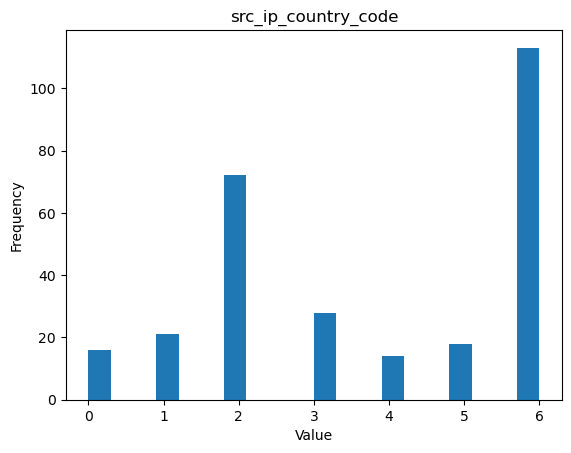

In [30]:
x['src_ip_country_code'].plot(kind='hist', bins=20, )
plt.title("src_ip_country_code")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Scaling the Data

Standardizing Features Using StandardScaler

In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x_scaled

array([[-0.28821898, -0.28122272, -0.45252816, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28210833, -0.26080425,  0.6368506 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28268922, -0.27934434,  0.01434845, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.79640323,  5.80278149, -0.29690262, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28818663, -0.28466509, -0.14127708, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28739087, -0.30923327, -0.60815369, ...,  0.        ,
         0.        ,  0.        ]])

### Splitting the Data into Training and Testing Sets

Creating Training and Testing Sets

In [33]:
x_train , x_test = train_test_split(x_scaled , test_size=0.2 , random_state =42)

### Training the Isolation Forest Model

In [34]:
model = IsolationForest(contamination=0.1,random_state=42)
model.fit(x_train)

IsolationForest(contamination=0.1, random_state=42)

#### Predicting Anomalies with the Isolation Forest Model

In [35]:
y_pred_test = model.predict(x_test)

In [36]:
y_pred_test

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [37]:
y_pred_test = [1 if x == 1 else 0 for x in y_pred_test]

In [38]:
y_pred_test

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [39]:
y_test = [1]*len(y_pred_test)

In [40]:
y_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [41]:
print("Classification Report:")
print(classification_report(y_test,y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95        57

    accuracy                           0.91        57
   macro avg       0.50      0.46      0.48        57
weighted avg       1.00      0.91      0.95        57



C:\Users\Maira Naveed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Maira Naveed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Maira Naveed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
conf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",conf_matrix)

Confusion Matrix:
 [[ 0  0]
 [ 5 52]]
